## Oppgave 3, teoridel:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fft, fftfreq, fftshift, ifft, ifftshift
import pandas as pd
from tqdm import tqdm

## Teorioppgave 1:
The θ-method is defined as,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) f(t_n, y_n) + \theta f(t_{n+1}, y_{n+1}) \right].
$$

This equals,

$$
y_{n+1} = y_n + h(1 - \theta) f(t_n, y_n) + h\theta f(t_{n+1}, y_{n+1}).
$$

Whereas a two-stage Runge-Kutta (RK) method has the general form,

$$
k_1 = f(t_n, y_n)
$$

$$
k_2 = f(t_n + a_{21}h, y_n + a_{21}h k_1)
$$

$$
y_{n + 1} =  y_n + h(\beta_1 k_1 + \beta_2 k_2)
$$

Which equals,

$$
y_{n + 1} =  y_n + h\beta_1 k_1 + h\beta_2 k_2
$$

We see already that the first part ($y_n + h\beta_1 k_1$) in the RK-method is equal to the corresponding part of the θ-method, assuming that $(1 - \theta) = \beta_1$. 

The latter part $h\theta f(t_{n+1}, y_{n+1})$ requires a bit more work.

To rewrite this part of the θ-method, we define:

$$
k_2 = f(t_n + h, y_n + h k_1),
$$

assuming that we approximate $y_{n+1}$ using an Euler-type predictor:

$$
y_{n+1} \approx y_n + h k_1.
$$

Substituting this into the θ-method gives an explicit two-stage Runge-Kutta method:

$$
y_{n+1} = y_n + h(1 - \theta) f(t_n, y_n) + h\theta f(t_n + h, y_n + h f(t_n, y_n)).
$$

So, the θ-method can be approximated by the following two-stage RK method:

$$
\begin{aligned}
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + h, y_n + h k_1), \\
y_{n+1} &= y_n + h\left((1 - \theta)k_1 + \theta k_2\right).
\end{aligned}
$$

---

### Butcher Table

The Butcher table for this method is:

$$
\begin{array}{c|cc}
0   & 0   & 0 \\
1   & 1   & 0 \\
\hline
    & 1 - \theta & \theta \\
\end{array}
$$

Where:
- $$( a_{21} = 1 )$$
- $$( c_1 = 0 ), ( c_2 = 1 )$$
- $$( b_1 = 1 - \theta ), ( b_2 = \theta )$$

This table represents an explicit two-stage Runge-Kutta method that approximates the θ-method for general $( \theta \in [0, 1])$.

---

### Special Cases

| θ       | Method              | Notes                        |
|---------|---------------------|------------------------------|
| 0       | Explicit Euler       | First-order accurate         |
| 0.5     | Heun's Method (RK2)  | Second-order, trapezoidal rule |
| 1       | Euler predictor for Backward Euler | Approximation only (not implicit) |


## Teorioppgave 2

In [2]:
def plot_stability(r, xlim, ylim, resolution=500):
    
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x,y)
    Z = X + 1j*Y
    
    R = np.abs(r(Z))
    
    plt.figure(figsize=(5,5))
    plt.contourf(X, Y, R, levels=[0,1], colors=['blue'], alpha=0.5)
    plt.contour(X, Y, R, levels=[1], colors=['black'])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.title(f'Stabilitetsområde, $θ = {θ}$')
    plt.grid(); plt.show()
    
def r(z):
    return (1+(1-θ)*z)/(1-θ*z)

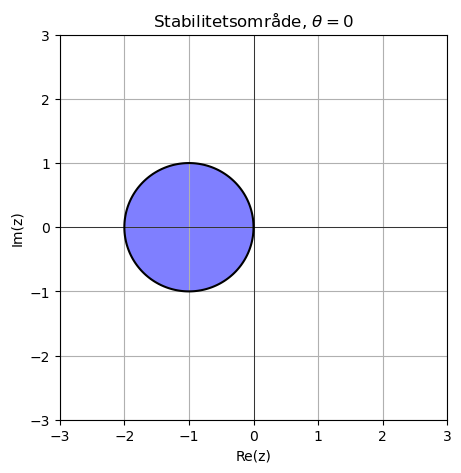

In [3]:
θ = 0

plot_stability(r, xlim=(-3,3), ylim=(-3,3))

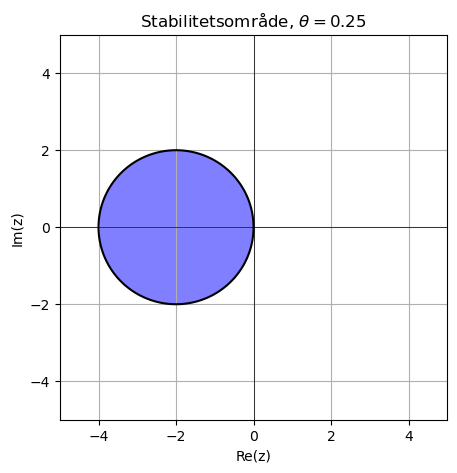

In [4]:
θ = 0.25

plot_stability(r, xlim=(-5,5), ylim=(-5,5))

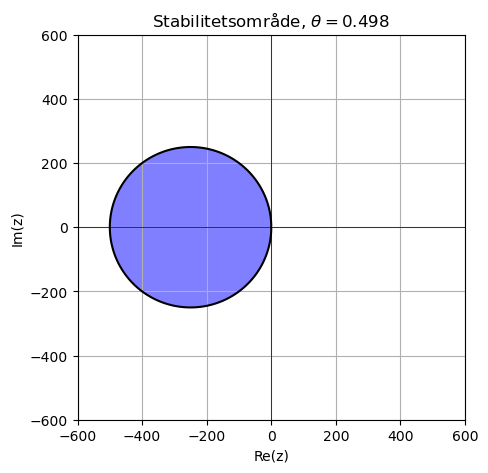

In [17]:


θ = 0.498

plot_stability(r, xlim=(-600,600), ylim=(-600,600))



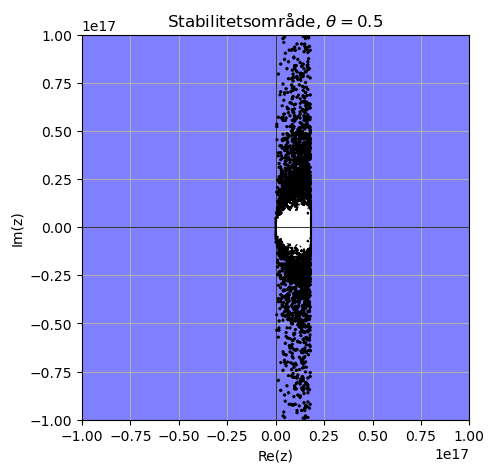

In [27]:
θ =0.5

plot_stability(r, xlim=(-1e17,1e17), ylim=(-1e17,1e17))

Comment: there appears to be some computational error for this plot. The expected result is that the area to the left of the imaginary axis should be stable, whereas the area to the right of the imaginary axis should not.

Since the left of the imaginary axis is stable for this $\theta$ value, it appears that the $\theta$-method is A-stable for $\theta = 0.5$

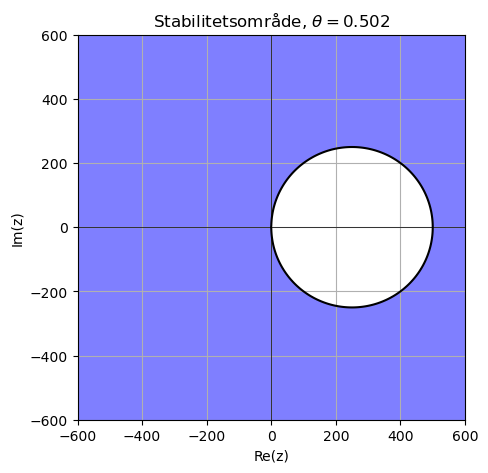

In [14]:
θ = 0.502

plot_stability(r, xlim=(-600,600), ylim=(-600,600))



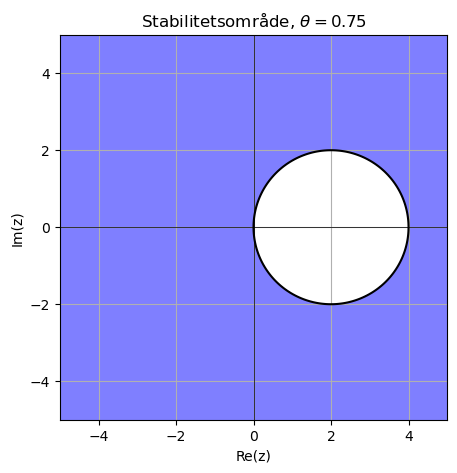

In [15]:
θ = 0.75

plot_stability(r, xlim=(-5,5), ylim=(-5,5))

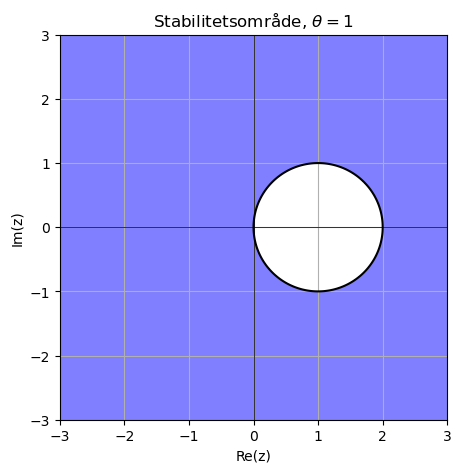

In [16]:


θ = 1

plot_stability(r, xlim=(-3,3), ylim=(-3,3))



## Teorioppgave 3

The **θ-method** is defined as,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) f(y_n) + \theta f(y_{n+1}) \right],
$$

We wish to show that the stability region $S_{\theta}$ can be defined as, $$\mathcal{S}_\theta = \left\{ z \in \mathbb{C} : \left| R(z) \right| \leq 1 \right\}$$.

This is done by inserting the test equation $y' = \lambda y, \lambda\in \mathbb{C}$ into the θ-method. This gives,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) \lambda y_n + \theta \lambda y_{n + 1}) \right],
$$

$$
y_{n+1} = y_n + h(1 - \theta) \lambda y_n + h \theta \lambda y_{n + 1}
$$

$$
y_{n+1} - h \theta \lambda y_{n + 1} = y_n + h(1 - \theta) \lambda y_n
$$

Factoring,

$$
y_{n+1}(1 - h \theta \lambda) = y_n + h(1 - \theta) \lambda y_n.
$$

Dividing b.s. with $y_n (1 - h \theta \lambda)$ yields,

$$
\frac{y_{n+1}}{y_n} = \frac {1 + h(1 - \theta) \lambda}{1 - h \theta \lambda}.
$$

Since $\lambda$ is a complex number scaled by a factor $h$, we can define a new complex number $z = h \lambda$, this simplifies the expression to,

$$
R(z) = \frac {1 + (z - \theta z)}{1 - z \theta}.
$$

This expression is the amplification factor of the method, and shows whether or not the method amplifies or dampens the solution over each successive step.
The stability region of the θ-method is defined on the area of the complex plane that satisfies,
$$
\mathcal{S}_\theta = \left\{ z \in \mathbb{C} : \left| R(z) \right| \leq 1 \right\}.
$$
We therefore have the inequality,
$$
\frac {|1 + (z - \theta z)|}{|1 - z \theta|} \leq 1.
$$

Rearranging this gives,

$$|1 + (z - \theta z)| \leq |1 - z \theta|$$.

This equation describes a circle, (or half-plane for $\theta = 0.5$) within the complex plane.

## Oppgave 3, numerikkdel:

The numerical scheme works by transforming the biharmonic differential equation into an algebraic equation in Fourier space. These algebraic equations are then solved using the theta method in Fourier space, before the inverse Fourier transform is applied to yield the final real result.

In [21]:
# Parameters
κ = 0.01
Nx, Ny = 64, 64
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
λ = 0.1
Nt = 100
θ = 0.5
U_0 = u_exact(X, Y, t_0, λ, κ)

In [22]:
def u_exact(x, y, t, λ, κ):
    # Function as defined in 3.2
    return np.sin(x)*np.cos(y)*np.exp(-λ*κ*t)

In [23]:
def discreteFourier(U):
    # Returns the two dimentional discrete Fourier transform of U
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    # Inverse Fourier transform
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g = None):
    """
    Solves the transient biharmonic equation using the theta method.

    Parameters:
    ----------- 
    κ (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U_0 (ndarray): Initial condition array.
    t_0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    
    
    # Grid resolution
    Nx, Ny = X.shape

    # Wavenumbers for spectral differentiation
    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    
    # Compute Laplacian squared in Fourier space (∇⁴ operator)
    L = -(KX**2 + KY**2)  # Laplacian in Fourier space
    L2 = L**2  # Biharmonic operator in Fourier space
    
    U_hat = discreteFourier(U_0)
    
    t = t_0 
    dt = (T-t_0)/Nt
    
    # For convenience when plotting, computing errors, etc., 
    # return the initial solution and initial time.
    yield U_hat, t    
    
    while t < T-dt/2:
        # Solves for next time step and update time
        t_new = t + dt
        
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new))
        else:
            g_hat = np.zeros_like(U_hat)
        
        # Solves the equations in Fourier space
        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        
        U_hat_new = (B * U_hat + dt * g_hat) / A

        U_hat = U_hat_new # Updates U_hat
        t = t_new
        
        yield U_hat, t
        
solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ = 0.5, g = None)

for U_hat, t in solver:
    U, t = inverseDiscreteFourier(U_hat), t
    print(f"Time: {t}, U: {U.shape}")

Time: 0, U: (64, 64)
Time: 0.01, U: (64, 64)
Time: 0.02, U: (64, 64)
Time: 0.03, U: (64, 64)
Time: 0.04, U: (64, 64)
Time: 0.05, U: (64, 64)
Time: 0.060000000000000005, U: (64, 64)
Time: 0.07, U: (64, 64)
Time: 0.08, U: (64, 64)
Time: 0.09, U: (64, 64)
Time: 0.09999999999999999, U: (64, 64)
Time: 0.10999999999999999, U: (64, 64)
Time: 0.11999999999999998, U: (64, 64)
Time: 0.12999999999999998, U: (64, 64)
Time: 0.13999999999999999, U: (64, 64)
Time: 0.15, U: (64, 64)
Time: 0.16, U: (64, 64)
Time: 0.17, U: (64, 64)
Time: 0.18000000000000002, U: (64, 64)
Time: 0.19000000000000003, U: (64, 64)
Time: 0.20000000000000004, U: (64, 64)
Time: 0.21000000000000005, U: (64, 64)
Time: 0.22000000000000006, U: (64, 64)
Time: 0.23000000000000007, U: (64, 64)
Time: 0.24000000000000007, U: (64, 64)
Time: 0.25000000000000006, U: (64, 64)
Time: 0.26000000000000006, U: (64, 64)
Time: 0.2700000000000001, U: (64, 64)
Time: 0.2800000000000001, U: (64, 64)
Time: 0.2900000000000001, U: (64, 64)
Time: 0.3000000

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
κ = 1
Nx, Ny = 20, 20  # Reduced Nx, Ny to match the problem
x = np.linspace(-np.pi, np.pi, Nx)
y = np.linspace(-np.pi, np.pi, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
λ = 0.1
Nt_values = [10, 20, 40, 80, 160, 320, 640]  # Different time step refinements
θ_values = [1, 0.5, 0]  # θ values to test
U_0 = np.sin(X) * np.cos(Y)  # Initial condition

def f(x, y, t, λ, κ):
    return np.sin(x) * np.cos(y) * np.exp(-λ * κ * t)

def discreteFourier(U):
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g=None):
    """
    Solves the transient biharmonic equation using the theta method.

    Parameters:
    -----------
    κ (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U_0 (ndarray): Initial condition array.
    t_0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    θ (float): Theta parameter for the method.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    Nx, Ny = X.shape

    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    
    L = -(KX**2 + KY**2)
    L2 = L**2
    
    U_hat = discreteFourier(U_0)
    t = t_0
    dt = (T - t_0) / Nt
    
    yield U_hat, t  # Yield initial condition
    
    # Stability limits for the numerical solver to prevent overflow or underflow
    MAX_VALUE = 1e10  # Max allowable value
    MIN_VALUE = 1e-10  # Min allowable value
    
    while t < T - dt / 2:
        t_new = t + dt
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new))
        else:
            g_hat = np.zeros_like(U_hat)
        
        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        
        # Clip the values of A and B to avoid numerical instability
        A = np.clip(A, MIN_VALUE, MAX_VALUE)
        B = np.clip(B, MIN_VALUE, MAX_VALUE)
        
        # Solve for the new Fourier transform of the solution
        U_hat_new = (B * U_hat + dt * g_hat) / A
        
        # Clip U_hat_new to avoid overflow or underflow
        U_hat_new = np.clip(U_hat_new, -MAX_VALUE, MAX_VALUE)
        
        U_hat = U_hat_new
        t = t_new
        
        yield U_hat, t

def compute_error(U_exact, U_numerical):
    # Compute the error in L∞ * L∞ norm (max in both time and space)
    return np.max(np.abs(U_exact - U_numerical))

def compute_EOC(errors):
    EOCs = []
    for i in range(1, len(errors)):
        if errors[i] == 0 or errors[i-1] == 0:
            EOCs.append(np.nan)  # Avoid division by zero
        else:
            EOC = np.log(errors[i-1] / errors[i]) / np.log(2)
            EOCs.append(EOC)
    return EOCs

# Loop over the θ values and Nt values
results = []
for θ in θ_values:
    for Nt in Nt_values:
        # Solve for the given Nt
        solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ=θ, g=None)
        
        errors = []
        for U_hat, t in solver:
            U_numerical = inverseDiscreteFourier(U_hat)
            U_exact = f(X, Y, t, λ, κ)
            error = compute_error(U_exact, U_numerical)
            errors.append(error)
        
        # Compute EOC for this run
        EOCs = compute_EOC(errors)
        avg_EOC = np.nanmean(EOCs) if EOCs else 0  # Use np.nanmean to avoid NaN values
        
        results.append({
            'θ': θ,
            'Nt': Nt,
            'Error': errors[-1],
            'EOC': avg_EOC
        })

# Display results
import pandas as pd
df = pd.DataFrame(results)
print(df)

      θ   Nt         Error        EOC
0   1.0   10  9.898920e+80 -32.006152
1   1.0   20  2.530333e+09  -4.111834
2   1.0   40  2.528709e+09  -2.055894
3   1.0   80  2.760589e+09  -1.029529
4   1.0  160  2.633770e+09  -0.514341
5   1.0  320  6.760706e+21  -0.385993
6   1.0  640  5.406673e+20  -0.187302
7   0.5   10  2.528707e+09  -8.223575
8   0.5   20  2.535122e+09  -4.111970
9   0.5   40  2.591193e+09  -2.056774
10  0.5   80  4.110263e+20  -1.493472
11  0.5  160  9.143595e+19  -0.733184
12  0.5  320  6.425024e+19  -0.365001
13  0.5  640  5.890320e+19  -0.182305
14  0.0   10  6.330119e+18 -11.345694
15  0.0   20  3.062707e+19  -5.786572
16  0.0   40  4.113534e+11  -2.239540
17  0.0   80  3.556573e+14  -1.241719
18  0.0  160  5.189761e+16  -0.665791
19  0.0  320  1.236636e+18  -0.347191
20  0.0  640  7.635181e+18  -0.177699
